In [1]:
import math
import datetime
import numpy as np
import calendar
import sympy
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Na dzień 1 XII
datazakupu = '01122022'
prowizja_wartość = 0.0019
liczba_obligacji = 1
cena_nominalna = 1000
t0 = 0
kurs0 = 1

#Obligacja 1 - EIB0227
# 1 wypłata w ciągu roku 
datawykupu1 = '15022027' 
datawykupu1=datetime.datetime.strptime(datawykupu1, '%d%m%Y').date()
data_wypłaty_ostatniego_kuponu1 = '15022022'

kurs1 = 99.84/100
oprocentowanie1 = 1 / 100
wartość_obligacji1 = oprocentowanie1 * cena_nominalna
c1 = wartość_obligacji1

#Obligacja 2 - EIB0228
# 1 wypłata w ciągu roku
datawykupu2 = '25022028'
datawykupu2=datetime.datetime.strptime(datawykupu2, '%d%m%Y').date()
data_wypłaty_ostatniego_kuponu2 = '25022022'

kurs2 = 99.81/100
oprocentowanie2 = 1 / 100
wartość_obligacji2 = oprocentowanie2 * cena_nominalna
c2 = wartość_obligacji2

#Obligacja 3 - FPC0328
# 1 wypłata w ciągu roku
datawykupu3 = '12032028'
datawykupu3=datetime.datetime.strptime(datawykupu3, '%d%m%Y').date()
data_wypłaty_ostatniego_kuponu3 = '12032022'

kurs3 = 75.9/100
oprocentowanie3 = 1.75 / 100
wartość_obligacji3 = oprocentowanie3 * cena_nominalna
c3 = wartość_obligacji3

#Obligacja 4 - WS0428
# 1 wypłata w ciągu roku
datawykupu4 = '25042028'
datawykupu4=datetime.datetime.strptime(datawykupu4, '%d%m%Y').date()
data_wypłaty_ostatniego_kuponu4 = '25042022'

kurs4 = 80/100
oprocentowanie4 = 2.75 / 100
wartość_obligacji4 = oprocentowanie4 * cena_nominalna
c4 = wartość_obligacji4

#Obligacja 5 - PS0728
# 1 wypłata w ciągu roku
datawykupu5 = '25072028'
datawykupu5=datetime.datetime.strptime(datawykupu5, '%d%m%Y').date()
data_wypłaty_ostatniego_kuponu5 = '25072022'

kurs5 = 95.37/100
oprocentowanie5 = 7.5 / 100
wartość_obligacji5 = oprocentowanie5 * cena_nominalna
c5 = wartość_obligacji5



datywykupu = [datawykupu1, datawykupu2, datawykupu3, datawykupu4, datawykupu5]
kursy = [kurs1, kurs2, kurs3, kurs4, kurs5]
oprocentowania = [oprocentowanie1, oprocentowanie2, oprocentowanie3, 
                  oprocentowanie4, oprocentowanie5]
wartości_obligacji = [wartość_obligacji1, wartość_obligacji2, 
                      wartość_obligacji3, wartość_obligacji4, wartość_obligacji5]
c = [c1, c2, c3, c4, c5]
daty_wykupu_ostatnich_kuponów = [data_wypłaty_ostatniego_kuponu1, 
                                 data_wypłaty_ostatniego_kuponu2, data_wypłaty_ostatniego_kuponu3, 
                                 data_wypłaty_ostatniego_kuponu4, data_wypłaty_ostatniego_kuponu5]

# Czas życia każdej obligacji

In [3]:
datazakupu = datetime.datetime.strptime(datazakupu, '%d%m%Y').date()
czas_życia1 = (datawykupu1 - datazakupu).days / 365
czas_życia2 = (datawykupu2 - datazakupu).days / 365
czas_życia3 = (datawykupu3 - datazakupu).days / 365
czas_życia4 = (datawykupu4 - datazakupu).days / 365
czas_życia5 = (datawykupu5 - datazakupu).days / 365

czasy_życia = [czas_życia1, czas_życia2, czas_życia3, czas_życia4, czas_życia5]

# Ile jeszcze kuponów

In [4]:
ilość_kuponów1 = math.ceil(czas_życia1)
ilość_kuponów2 = math.ceil(czas_życia2)
ilość_kuponów3 = math.ceil(czas_życia3)
ilość_kuponów4 = math.ceil(czas_życia4)
ilość_kuponów5 = math.ceil(czas_życia5)

ilości_kuponów = [ilość_kuponów1, ilość_kuponów2, ilość_kuponów3, 
                  ilość_kuponów4, ilość_kuponów5]

# Liczenie P

In [5]:
datazakupu = '01122022'
def cena_czysta(kurs, cena_nominalna):
    return kurs * cena_nominalna

def odsetki(data_zakupu, data_wykupu, wartość_kuponu):
    t1 = datetime.datetime.strptime(data_wykupu, '%d%m%Y').date()
    t2 = datetime.datetime.strptime(data_zakupu, '%d%m%Y').date()
    liczba_dni_od_ostatniego_kuponu = (t2 - t1).days
    
    dni_spot = 2
    if t2.weekday() == 3 or t2.weekday() == 4:
        dni_spot += 2
    
    liczba_dni_w_okresie_odsetkowym = 365 + int(calendar.isleap(t2.year))
    
    odsetki = ((liczba_dni_od_ostatniego_kuponu + dni_spot)/liczba_dni_w_okresie_odsetkowym) * wartość_kuponu
    
    return odsetki

def cena_brudna(cena_czysta, odsetki):
    return cena_czysta + odsetki

def koszt_bez_prowizji(liczba_obligacji, cena_brudna):
    return liczba_obligacji * cena_brudna

def prowizja(prowizja, koszt_bez_prowizji):
    return prowizja_wartość * koszt_bez_prowizji

def koszt(koszt_bez_prowizji, prowizja):
    koszt_zakupu = koszt_bez_prowizji + prowizja
    return koszt_zakupu



# Koszt czyli P dla każdej obligacji

In [6]:
ceny_czyste = []
odsetki_całość = []
ceny_brudne = []
koszty = []
prowizje = []
koszty_bez_prowizji = []
for i in range (0,5):
    ceny_czyste.append(cena_czysta(kursy[i], cena_nominalna))
    odsetki_całość.append(odsetki(datazakupu, daty_wykupu_ostatnich_kuponów[i], 
                                  wartości_obligacji[i]))
    ceny_brudne.append(cena_brudna(ceny_czyste[i], odsetki_całość[i]))
    koszty_bez_prowizji.append(koszt_bez_prowizji(liczba_obligacji, 
                                                  ceny_brudne[i]))
    prowizje.append(prowizja(prowizja_wartość, koszty_bez_prowizji[i]))
    koszty.append(koszt(koszty_bez_prowizji[i], prowizje[i]))
koszty    

[1008.3396093150686,
 1007.7645461643835,
 773.3158287671233,
 818.4287780821918,
 982.892721780822]

In [7]:
koszt1 = koszty[0]
koszt2 = koszty[1]
koszt3 = koszty[2]
koszt4 = koszty[3]
koszt5 = koszty[4]

# r

In [8]:
x = sympy.Symbol('x')

def fx(P,wartosc_kuponu, czas_życia, ilosc_kuponow):
    
    tn = czas_życia 
    suma = 0
    for i in range(ilosc_kuponow):
        suma += wartosc_kuponu*pow(1+x,i)
    suma = (suma-P*pow(1+x,tn)+cena_nominalna)
    return suma

def bis(fx,a,b,err):
    while np.absolute(b-a)>err:
        midPoint=(a+b)*0.5
        if fx.subs(x, midPoint)*fx.subs(x,a)<0:
            b=midPoint
        midPoint=(a+b)*0.5
        if fx.subs(x, midPoint)*fx.subs(x, b)<0:
            a=midPoint
    return b-(b-a)*fx.subs(x,b)/(fx.subs(x,b)-fx.subs(x,a))

In [9]:
fx(koszt1, wartość_obligacji1, czas_życia1, ilość_kuponów1)

10.0*x + 10.0*(x + 1)**4 + 10.0*(x + 1)**3 + 10.0*(x + 1)**2 - 1008.33960931507*(x + 1)**4.21095890410959 + 1020.0

In [10]:
r1 = float(bis(fx(koszt1, wartość_obligacji1, czas_życia1, ilość_kuponów1), 0, 
               1, 0.0001))
r2 = float(bis(fx(koszt2, wartość_obligacji2, czas_życia2, ilość_kuponów2), 0, 
               1, 0.0001))
r3 = float(bis(fx(koszt3, wartość_obligacji3, czas_życia3, ilość_kuponów3), 0, 
               1, 0.0001))
r4 = float(bis(fx(koszt4, wartość_obligacji4, czas_życia4, ilość_kuponów4), 0, 
               1, 0.0001))
r5 = float(bis(fx(koszt5, wartość_obligacji5, czas_życia5, ilość_kuponów5), 0, 
               1, 0.0001))
r = [r1, r2, r3, r4, r5]

In [11]:
r1

0.009888566316048147

# B

In [12]:
def B(czas_życia, r):
    return (1 + r)**(-czas_życia)

In [13]:
struktury = []
for i in range(0,5):
    struktury.append(B(czasy_życia[i], r[i]))


In [14]:
struktury

[0.9594109160551727,
 0.9493640591041496,
 0.6865463591128349,
 0.6830110595359907,
 0.6313291508103844]

In [15]:
struktury.insert(0,1)
czasy_życia.insert(0,0)

In [16]:
czasy_życia

[0,
 4.210958904109589,
 5.238356164383561,
 5.282191780821917,
 5.402739726027397,
 5.652054794520548]

(0.0, 1.0)

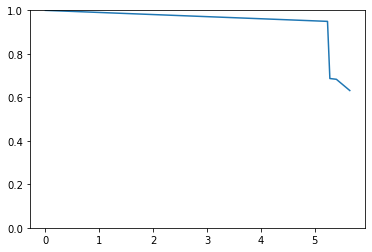

In [17]:
plt.plot(czasy_życia, struktury)
plt.ylim(0,1)

# Przedłużenie 1

In [19]:
t1 = np.arange(czasy_życia[0], czasy_życia[1],0.001)
t2 = np.arange(czasy_życia[1], czasy_życia[2], 0.001)
t3 = np.arange(czasy_życia[2], czasy_życia[3], 0.001)
t4 = np.arange(czasy_życia[3], czasy_życia[4], 0.001)
t5 = np.arange(czasy_życia[4], czasy_życia[5], 0.001)
t = [t1, t2, t3, t4, t5]
#1
struk1=(struktury[0]**((czasy_życia[1] - t1)/(czasy_życia[1] - czasy_życia[0]))) * (struktury[1]**((t1 - czasy_życia[0])/(czasy_życia[1] - czasy_życia[0])))
#2
struk2=(struktury[1]**((czasy_życia[2] - t2)/(czasy_życia[2] - czasy_życia[1]))) * (struktury[2]**((t2 - czasy_życia[1])/(czasy_życia[2] - czasy_życia[1])))
#3
struk3=(struktury[2]**((czasy_życia[3] - t3)/(czasy_życia[3] - czasy_życia[2]))) * (struktury[3]**((t3 - czasy_życia[2])/(czasy_życia[3] - czasy_życia[2])))
#4
struk4=(struktury[3]**((czasy_życia[4] - t4)/(czasy_życia[4] - czasy_życia[3]))) * (struktury[4]**((t4 - czasy_życia[3])/(czasy_życia[4] - czasy_życia[3])))
#5
struk5=(struktury[4]**((czasy_życia[5] - t5)/(czasy_życia[5] - czasy_życia[4]))) * (struktury[5]**((t5 - czasy_życia[4])/(czasy_życia[5] - czasy_życia[4])))

struks=[struk1, struk2, struk3, struk4, struk5]

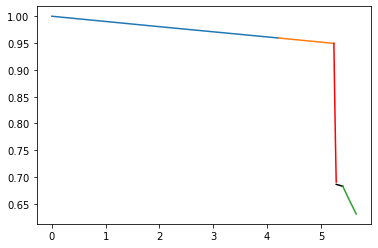

In [20]:
plt.plot(t1,struk1)
plt.plot(t2,struk2)
plt.plot(t3,struk3, color = 'red')
plt.plot(t4,struk4, color = 'black')
plt.plot(t5,struk5)
plt.savefig('plot1.png')

# Przedłużenie 2

In [21]:
s1 = struktury[0] + (struktury[1] - struktury[0])*((t1 - czasy_życia[0])/
                                                   (czasy_życia[1] - czasy_życia[0]))
s2 = struktury[1] + (struktury[2] - struktury[1])*((t2 - czasy_życia[1])/
                                                   (czasy_życia[2] - czasy_życia[1]))
s3 = struktury[2] + (struktury[3] - struktury[2])*((t3 - czasy_życia[2])/
                                                   (czasy_życia[3] - czasy_życia[2]))
s4 = struktury[3] + (struktury[4] - struktury[3])*((t4 - czasy_życia[3])/
                                                   (czasy_życia[4] - czasy_życia[3]))
s5 = struktury[4] + (struktury[5] - struktury[4])*((t5 - czasy_życia[4])/
                                                   (czasy_życia[5] - czasy_życia[4]))
s = [s1, s2, s3, s4, s5]

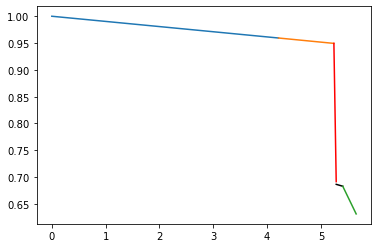

In [22]:
plt.plot(t1,s1)
plt.plot(t2,s2)
plt.plot(t3,s3, color = 'red')
plt.plot(t4,s4, color = 'black')
plt.plot(t5,s5)
plt.savefig('plot2.png')

In [23]:
t10 = str(czasy_życia[0])
t11 = str(czasy_życia[1])
t12 = str(czasy_życia[2])
t13 = str(czasy_życia[3])
t14 = str(czasy_życia[4])
t15 = str(czasy_życia[5])

tt1 = t10 + ' - ' + t11
tt2 = t11 + ' - ' + t12
tt3 = t12 + ' - ' + t13
tt4 = t13 + ' - ' + t14
tt5 = t14 + ' - ' + t15
tt = [tt1, tt2, tt3, tt4, tt5]

In [24]:
przedłużenie_mean1 = []
for i in range (0,5):
    przedłużenie_mean1.append(np.mean(struks[i]))

In [25]:
przedłużenie_mean1

[0.9795699313404349,
 0.9543806214542235,
 0.8134026392748627,
 0.6847852288316443,
 0.6568648496335716]

In [26]:
przedłużenie_mean2 = []
for i in range (0,5):
    przedłużenie_mean2.append(np.mean(s[i]))

In [27]:
przedłużenie_mean2

[0.9797100794262139,
 0.9543894299720034,
 0.8204601903114909,
 0.6847867440961778,
 0.6572027613242967]

In [28]:
dane = {'Przedziały': tt, 'Przedłużenie 1': przedłużenie_mean1, 'Przedłużenie 2': przedłużenie_mean2}
df = pd.DataFrame(dane)
df.set_index('Przedziały', inplace = True)
df1 = df.style.set_caption('Średnie wartości na przedziałach dla obydwu przedłużeń terminowych').set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '15px'),
        ('font-style', 'italic'),
 
        ('text-align', 'center')
    ]
    
}])

In [29]:
df1

,Przedłużenie 1,Przedłużenie 2
Przedziały,,
0 - 4.210958904109589,0.979570,0.979710
4.210958904109589 - 5.238356164383561,0.954381,0.954389
5.238356164383561 - 5.282191780821917,0.813403,0.820460
5.282191780821917 - 5.402739726027397,0.684785,0.684787
5.402739726027397 - 5.652054794520548,0.656865,0.657203
